<a href="https://colab.research.google.com/github/zw2791/Real-Data-Practices/blob/main/KMeans_Clustering_on_Taxes_police_incidents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# ignore warnings
import warnings; warnings.filterwarnings('ignore')

In [54]:
# load data
path = '/content/Police_Incidents.csv'
df = pd.read_csv(path, on_bad_lines='skip')

r, c = df.shape
print(f"This dataset has {r} rows and {c} columns")

This dataset has 201206 rows and 103 columns


In [42]:
# quick inspect
df.head()

,Incident Number w/ Year,Year of Incident,Incident Number wo/ Year,Offense Service Number,Service Number ID,Watch,Call (911) Problem,Type of Incident,Penalty Class,Type of Location,...,Offense Type,Modus Operandi (MO),Family Offense,Hate Crime,Gang Related Offense,Victim Package,Drug Related Incident,Update Date,Location1,DivisionColor
0,276285-2016,2016,276285,276285D,276285-2016-01,U,11R - BURG OF RES,BURGLARY OF HABITATION - FORCED ENTRY,F2,Apartment Residence,...,PART1,UNKNOWN SUSPECT GAINED FORCED ENTRY TO APT AND...,No,NaN,No,NaN,No,11/26/2016 08:29:01 PM,"5850 BELT LINE RD\nDALLAS, TX 75254\n(32.95394...",2
1,277474-2016,2016,277474,277474D,277474-2016-01,1,7X - MAJOR ACCIDENT,ACCIDENT INV DAMAGE TO VEHICLE,MB,Motor Vehicle,...,PART2,SUSPECT HIT COMP'S VEHICLE AND FLED SCENE.,No,NaN,No,NaN,No,12/02/2016 09:00:04 PM,"4400 W DAVIS ST\nDALLAS, TX 75211\n(32.749608,...",7
2,276593-2016,2016,276593,276593D,276593-2016-01,3,55 - TRAFFIC STOP,FOUND PROPERTY (NO OFFENSE),NaN,"Highway, Street, Alley ETC",...,NOT CODED,FOUND PROPERTY,No,NaN,No,NaN,No,11/21/2016 06:43:35 AM,"600 E COLORADO BLVD\nDALLAS, TX 75203\n(32.758...",7
3,276430-2016,2016,276430,276430D,276430-2016-01,3,20 - ROBBERY,ROBBERY OF BUSINESS (AGG),F1,Restaurant/Food Service/TABC Location,...,PART1,SUSP ENTERED LOC SHOWED WIT#1 HANDGUN TOOK COM...,No,NaN,No,NaN,UNK,12/19/2016 06:41:29 AM,"2231 SINGLETON BLVD\nDALLAS, TX 75212\n(32.778...",7
4,277049-2016,2016,277049,277049D,277049-2016-01,1,PSE/09 - THEFT,"THEFT OF PROP > OR EQUAL $2,500 BUT <$30K- NOT...",FS,Other,...,PART1,UNKNOWN SUSPECT REMOVED COMPLAINANT WATCH FROM...,No,NaN,No,NaN,No,11/23/2016 11:51:58 AM,"400 CRESCENT CT\nDALLAS, TX 75201\n(32.794004,...",1


## Clustering Analysis on Divisions

In [34]:
# check stats for X and Y
df.groupby(by='Division')[' X Coordinate ', ' Y Coordinate'].count()

,X Coordinate,Y Coordinate
Division,,
Central,26257,26257
North Central,20506,20506
NorthEast,34814,34814
NorthWest,29478,29478
South Central,25375,25375
SouthEast,30282,30282
SouthWest,30640,30640


### The Actual Distribution

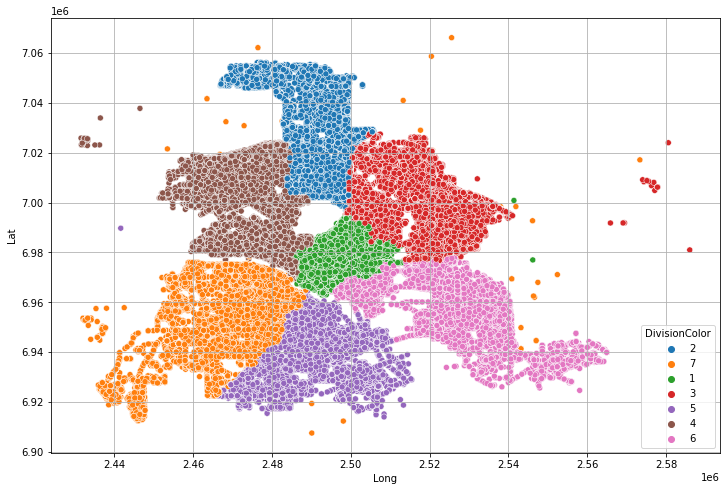

In [27]:
#assigning each division a number for color mapping
def color(row):
    if row['Division'] == 'Central':
        return '1'
    elif row['Division'] == 'North Central':
        return '2' 
    elif row['Division'] == 'NorthEast':
        return '3'  
    elif row['Division'] == 'NorthWest':
        return '4'  
    elif row['Division'] == 'South Central':
        return '5'  
    elif row['Division'] == 'SouthEast':
        return '6' 
    else:
        return '7' 

df['DivisionColor'] = df.apply(color, axis=1)

# plot divisions
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x=' X Coordinate ', y=' Y Coordinate', 
                    hue=df['DivisionColor'])
plt.xlabel('Long'), plt.ylabel('Lat')

plt.grid()

### Let's use K means clustering (7 Clusters)

In [70]:
# first we clean na values in X and Y
df2 = df.dropna(subset=[' X Coordinate ',' Y Coordinate'])

In [78]:
X1 = df2[[' X Coordinate ',' Y Coordinate']]
X1.isna().mean()

 X Coordinate     0.0
 Y Coordinate     0.0
dtype: float64

Cluster Centers Are:

[[2.46878440e+06 7.00139577e+06 5.32907009e-04]
 [2.46616921e+06 6.94399688e+06 1.01607554e+00]
 [2.48811795e+06 7.03545257e+06 2.00000000e+00]
 [2.51312417e+06 7.00636227e+06 3.00000000e+00]
 [2.49239586e+06 6.93974581e+06 4.00000000e+00]
 [2.52952639e+06 6.96086843e+06 4.99963885e+00]
 [2.49281893e+06 6.97422188e+06 5.99829258e+00]]

Sum of Distances of Each Dot to Cluster Center:

41682434995917.81


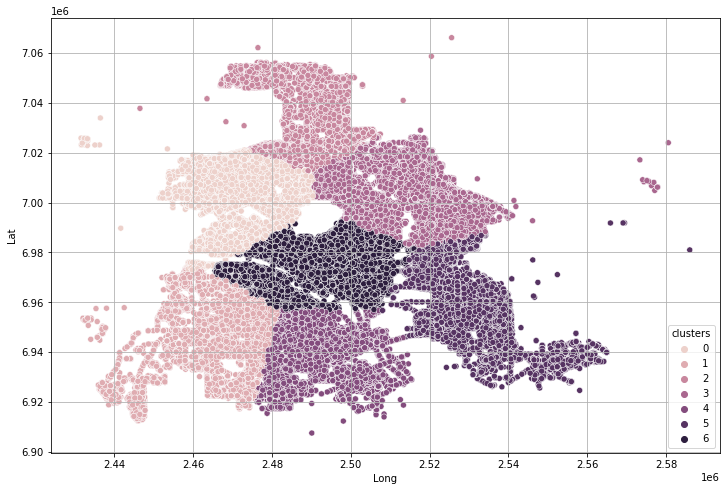

In [85]:
from sklearn.cluster import KMeans

cls = KMeans(n_clusters=7, random_state=0).fit(X1)
clusters = cls.labels_ # the labels from kmeans clustering
X1['clusters'] = clusters

plt.figure(figsize=(12, 8))
sns.scatterplot(data=X1, x=' X Coordinate ', y=' Y Coordinate',
                  hue='clusters')
plt.xlabel('Long'), plt.ylabel('Lat')
plt.grid()

print ("Cluster Centers Are:")
print ("")
print (cls.cluster_centers_)
print ("")
print ("Sum of Distances of Each Dot to Cluster Center:",)
print ("")
print (cls.inertia_)

#### We see the K means clustering distribution is close to the actual distribution

### What will it be if we change the cluster number to 5?

Cluster Centers Are:

[[2.47857052e+06 6.94137601e+06 2.50808911e+00 6.35270204e-05]
 [2.51162921e+06 7.00863522e+06 2.88614266e+00 1.00098639e+00]
 [2.47567677e+06 7.02150391e+06 9.64135290e-01 1.99923421e+00]
 [2.48938009e+06 6.97616920e+06 5.15617631e+00 3.00049441e+00]
 [2.52771792e+06 6.96123876e+06 4.99252349e+00 4.00000000e+00]]

Sum of Distances of Each Dot to Cluster Center:

62062074225591.22


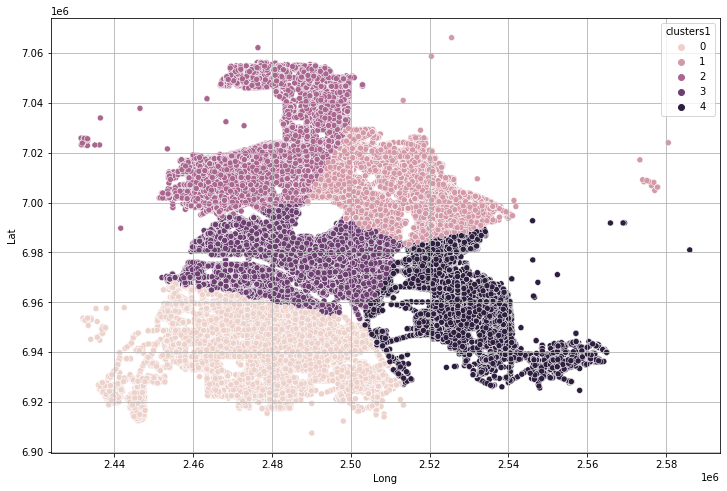

In [90]:
cls1 = KMeans(n_clusters=5, random_state=0).fit(X1)
clusters1 = cls1.labels_ # the labels from kmeans clustering
X1['clusters1'] = clusters1

plt.figure(figsize=(12, 8))
sns.scatterplot(data=X1, x=' X Coordinate ', y=' Y Coordinate',
                  hue='clusters1')
plt.xlabel('Long'), plt.ylabel('Lat')
plt.grid()

print ("Cluster Centers Are:")
print ("")
print (cls1.cluster_centers_)
print ("")
print ("Sum of Distances of Each Dot to Cluster Center:",)
print ("")
print (cls1.inertia_)

### How about with 9?

Sum of Distances of Each Dot to Cluster Center:

29671783934523.22


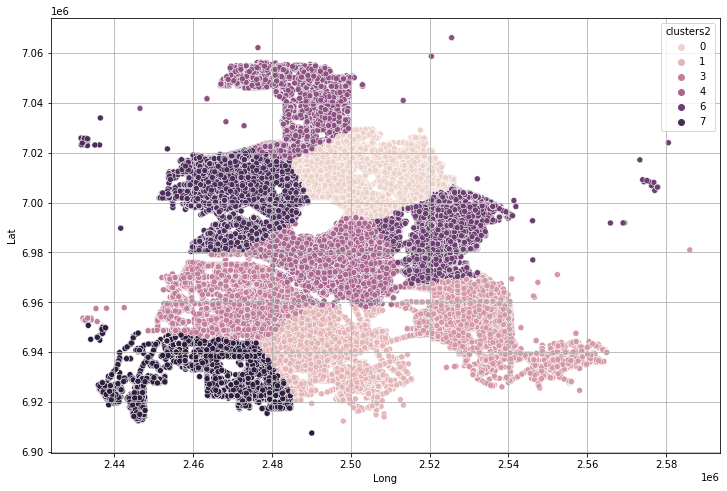

In [93]:
cls2 = KMeans(n_clusters=9, random_state=0).fit(X1)
clusters2 = cls2.labels_ # the labels from kmeans clustering
X1['clusters2'] = clusters2

plt.figure(figsize=(12, 8))
sns.scatterplot(data=X1, x=' X Coordinate ', y=' Y Coordinate',
                  hue='clusters2')
plt.xlabel('Long'), plt.ylabel('Lat')
plt.grid()

print ("Sum of Distances of Each Dot to Cluster Center:",)
print ("")
print (cls2.inertia_)